In [1]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.utils import to_categorical

download dataset and split

In [2]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

extract 4 classes

In [4]:
# Flatten the label arrays
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

# Define selected class labels (airplane=0, automobile=1, bird=2, cat=3)
selected_classes = [0, 1, 2, 3]

# Create boolean masks to select only the desired classes
train_mask = np.isin(y_train, selected_classes)
test_mask = np.isin(y_test, selected_classes)

# Apply the masks to filter images and labels
X_train_filtered = X_train[train_mask]
y_train_filtered = y_train[train_mask]
X_test_filtered = X_test[test_mask]
y_test_filtered = y_test[test_mask]

# Normalize the image pixel values to [0, 1]
X_train_filtered = X_train_filtered / 255.0
X_test_filtered = X_test_filtered / 255.0

# One-hot encode the labels with num_classes=4 (since we have 4 classes)
y_train_oh = to_categorical(y_train_filtered, num_classes=4)
y_test_oh = to_categorical(y_test_filtered, num_classes=4)

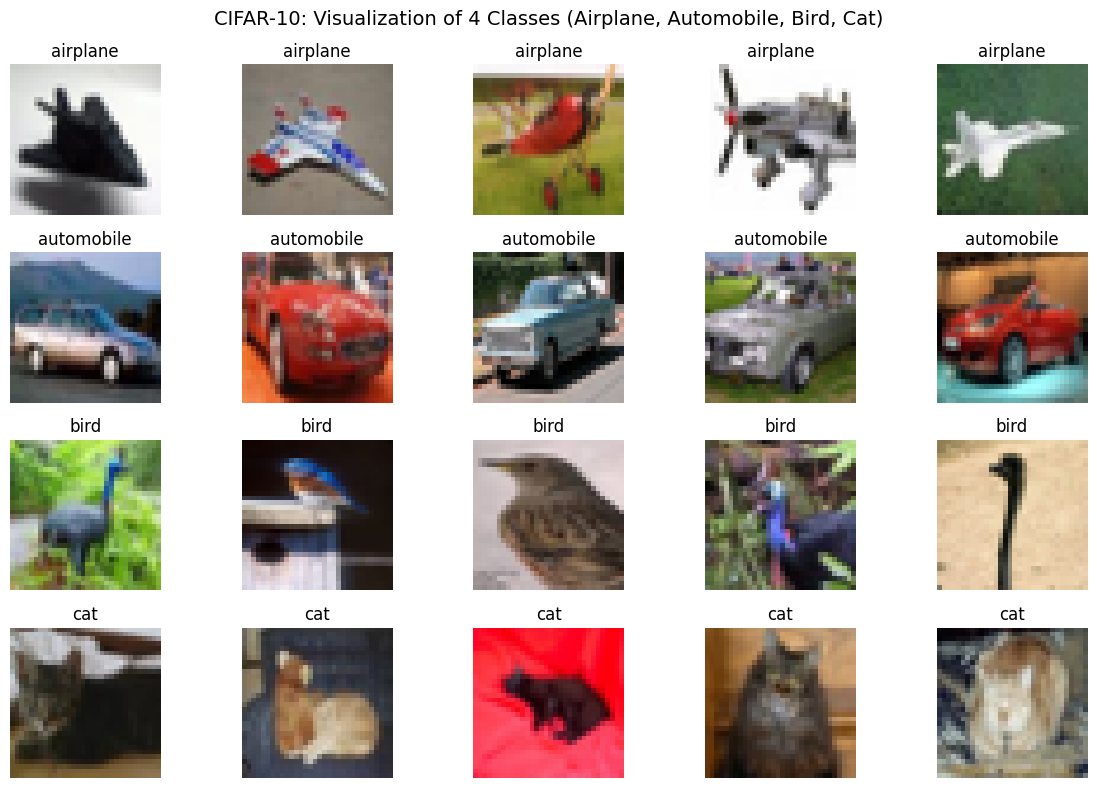

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat']
selected_classes = [0, 1, 2, 3]

plt.figure(figsize=(12, 8))

# Plot 5 images for each of the 4 selected classes
for class_index, class_label in enumerate(selected_classes):
    # Find the indices of images that belong to the current class
    indices = np.where(y_train_filtered == class_label)[0]
    # Plot 5 images for this class
    for i in range(5):
        plt.subplot(4, 5, class_index * 5 + i + 1)
        plt.imshow(X_train_filtered[indices[i]])
        plt.title(class_names[class_index])
        plt.axis('off')

plt.suptitle("CIFAR-10: Visualization of 4 Classes (Airplane, Automobile, Bird, Cat)", fontsize=14)
plt.tight_layout()
plt.show()

In [6]:
model= Sequential()
# flatten the image into 1D vector (3072)
model.add(Flatten(input_shape=(32,32,3)))
# first hidden layer
model.add(Dense(512,activation = 'relu'))
# output layer
model.add(Dense(4,activation ='softmax'))


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 1,575,428
Trainable params: 1,575,428
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [17]:
model.fit(X_train_filtered, y_train_oh, epochs=20, batch_size=64)

Epoch 1/20
313/313 [==============================] - 1s 3ms/step - loss: 0.6880 - accuracy: 0.7299
Epoch 2/20
313/313 [==============================] - 1s 3ms/step - loss: 0.6940 - accuracy: 0.7258
Epoch 3/20
313/313 [==============================] - 1s 3ms/step - loss: 0.6823 - accuracy: 0.7337
Epoch 4/20
313/313 [==============================] - 1s 3ms/step - loss: 0.6716 - accuracy: 0.7361
Epoch 5/20
313/313 [==============================] - 1s 3ms/step - loss: 0.6620 - accuracy: 0.7395
Epoch 6/20
313/313 [==============================] - 1s 3ms/step - loss: 0.6570 - accuracy: 0.7399
Epoch 7/20
313/313 [==============================] - 1s 3ms/step - loss: 0.6478 - accuracy: 0.7458
Epoch 8/20
313/313 [==============================] - 1s 3ms/step - loss: 0.6332 - accuracy: 0.7526
Epoch 9/20
313/313 [==============================] - 1s 3ms/step - loss: 0.6296 - accuracy: 0.7518
Epoch 10/20
313/313 [==============================] - 1s 3ms/step - loss: 0.6288 - accuracy: 0.7499

In [18]:
model.evaluate(X_test_filtered, y_test_oh)


125/125 [==============================] - 0s 2ms/step - loss: 0.7500 - accuracy: 0.7140


[0.7500455975532532, 0.7139999866485596]

1/1 [==============================] - 0s 20ms/step


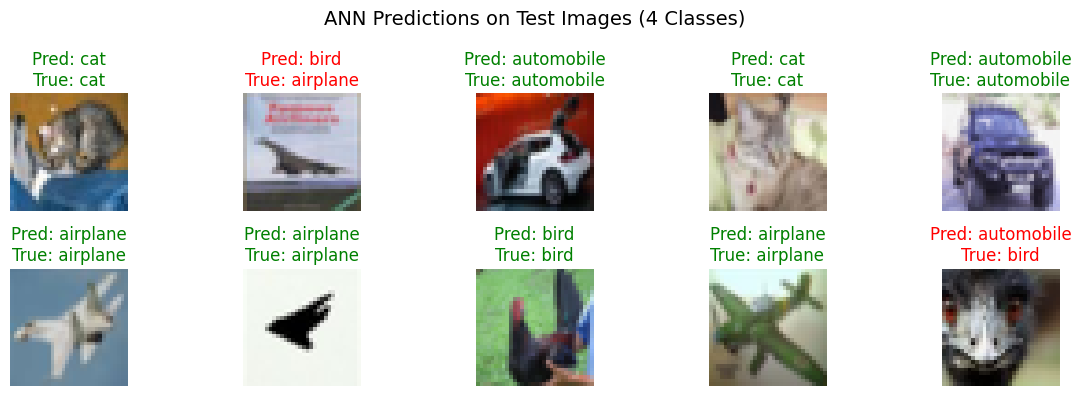

In [19]:
pred_probs = model.predict(X_test_filtered[:10])
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = np.argmax(y_test_oh[:10], axis=1)

# Class labels for 4 selected classes
class_names = ['airplane', 'automobile', 'bird', 'cat']

# Plot predictions with colored titles
plt.figure(figsize=(12, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test_filtered[i])
    plt.title(f"Pred: {class_names[pred_classes[i]]}\nTrue: {class_names[true_classes[i]]}",
              color="green" if pred_classes[i] == true_classes[i] else "red")
    plt.axis('off')

plt.suptitle("ANN Predictions on Test Images (4 Classes)", fontsize=14)
plt.tight_layout()
plt.show()